<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Surface Plot</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.colors import LightSource, LinearSegmentedColormap

from mpl_toolkits.mplot3d import Axes3D

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: cd9fbe0cf2e8e0ef15a217412e487460a988d933

pandas    : 1.1.3
numpy     : 1.19.2
watermark : 2.1.0
matplotlib: 3.3.2
json      : 2.0.9



# US Population

Load the raw data

In [3]:
data = np.loadtxt('https://raw.githubusercontent.com/DataForScience/DataViz/master/data/US_pop.mat')

And make a quick visualization

(-0.5, 245.5, 118.5, -0.5)

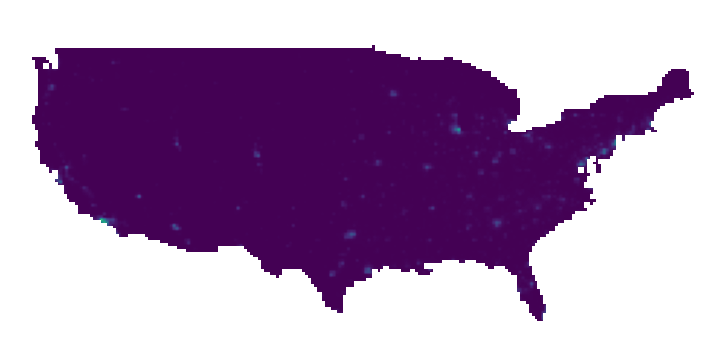

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12.8, 8.8))
ax.imshow(data)
ax.axis('off')

Due to the wide range of values, we don't see much. A common trick is to scale the values logarithmically for better visibility

(-0.5, 245.5, 118.5, -0.5)

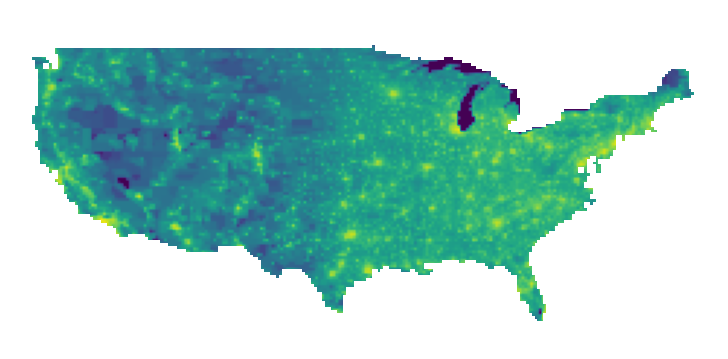

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12.8, 8.8))
ax.imshow(np.log10(data+1))
ax.axis('off')

We can also define our own color map

In [6]:
colors = [
    "#2C75FF", 
    "#7DF9FF"]
electric = LinearSegmentedColormap.from_list("mycmap", colors)

And use it

(-0.5, 245.5, 118.5, -0.5)

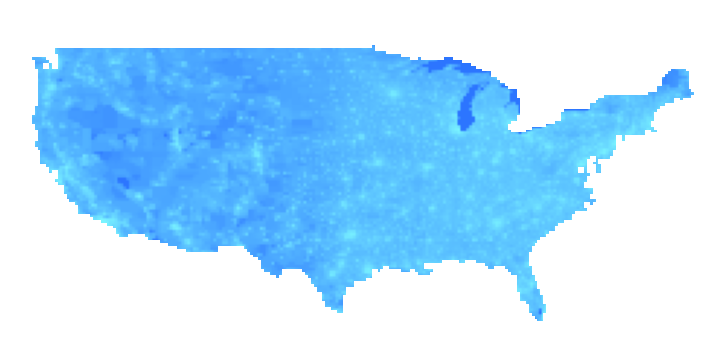

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12.8, 8.8))
ax.imshow(np.log10(data+1), cmap=electric)
ax.axis('off')

# Plot surface

Make a copy of the data

In [8]:
Z=data.copy()

remove the nan values from the original data

In [9]:
data[np.isnan(data)] = 0

Create the X, Y and Z matrices. __plot_surface__ expects three matrices of the same size for X, Y and Z with the respective coordinate values

In [10]:
x = np.arange(Z.shape[1])[::-1]
y = np.arange(Z.shape[0])
X, Y = np.meshgrid(x, y)

Generate a simple plot

<ipython-input-11-e91c1bcd5dec>:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z)


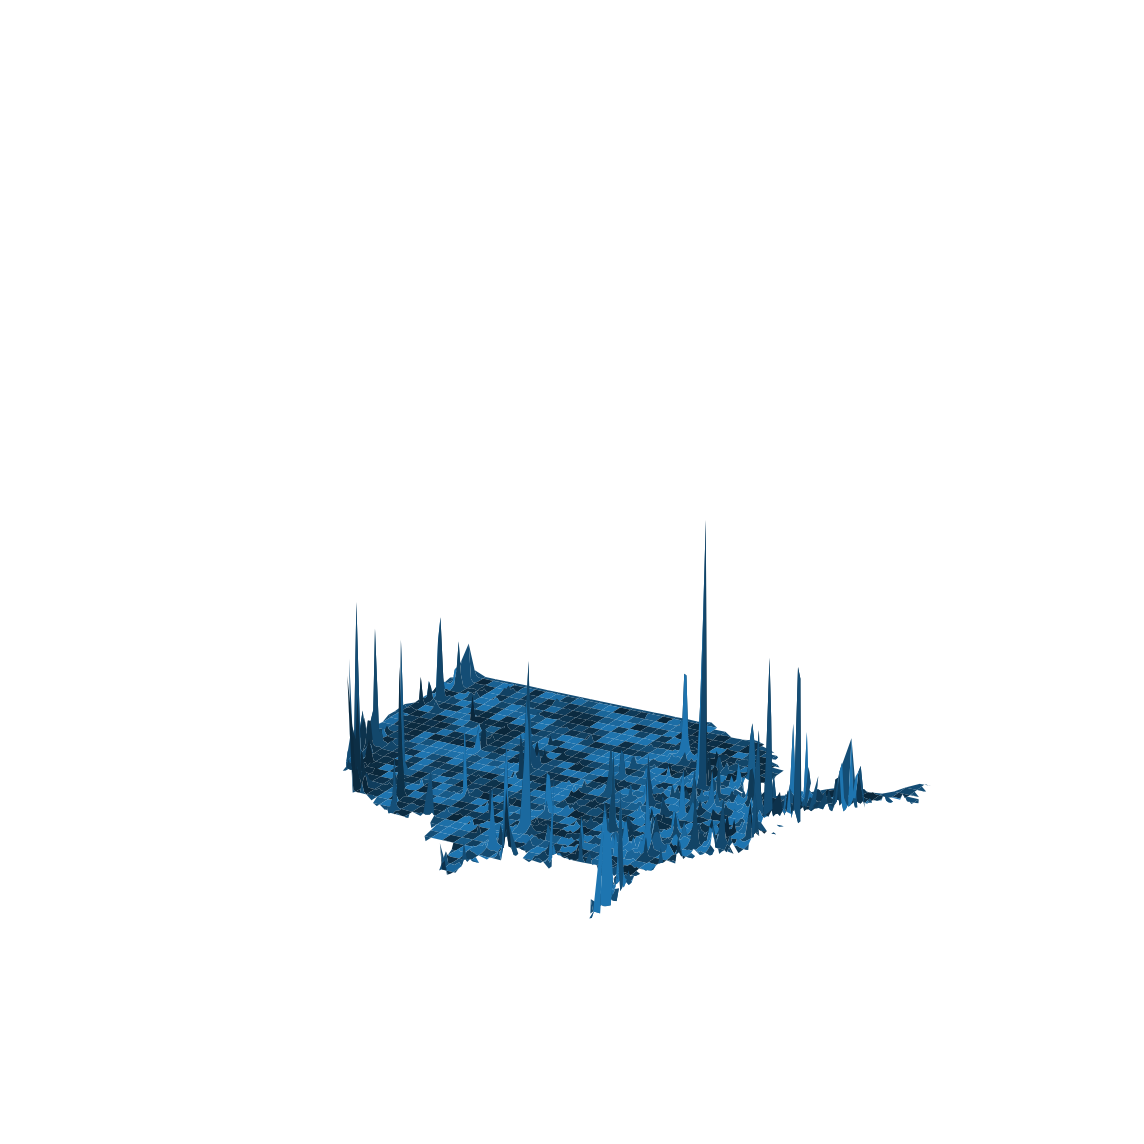

In [11]:
fig = plt.figure(figsize=(16, 16))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z)

# Define the view point, 
# the location from which we are looking at the surface
ax.view_init(20, 120)
ax.axis('off')
fig.tight_layout()

Add fancy shading

<ipython-input-12-24f86d634cf6>:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf = ax.plot_surface(X, Y, Z,


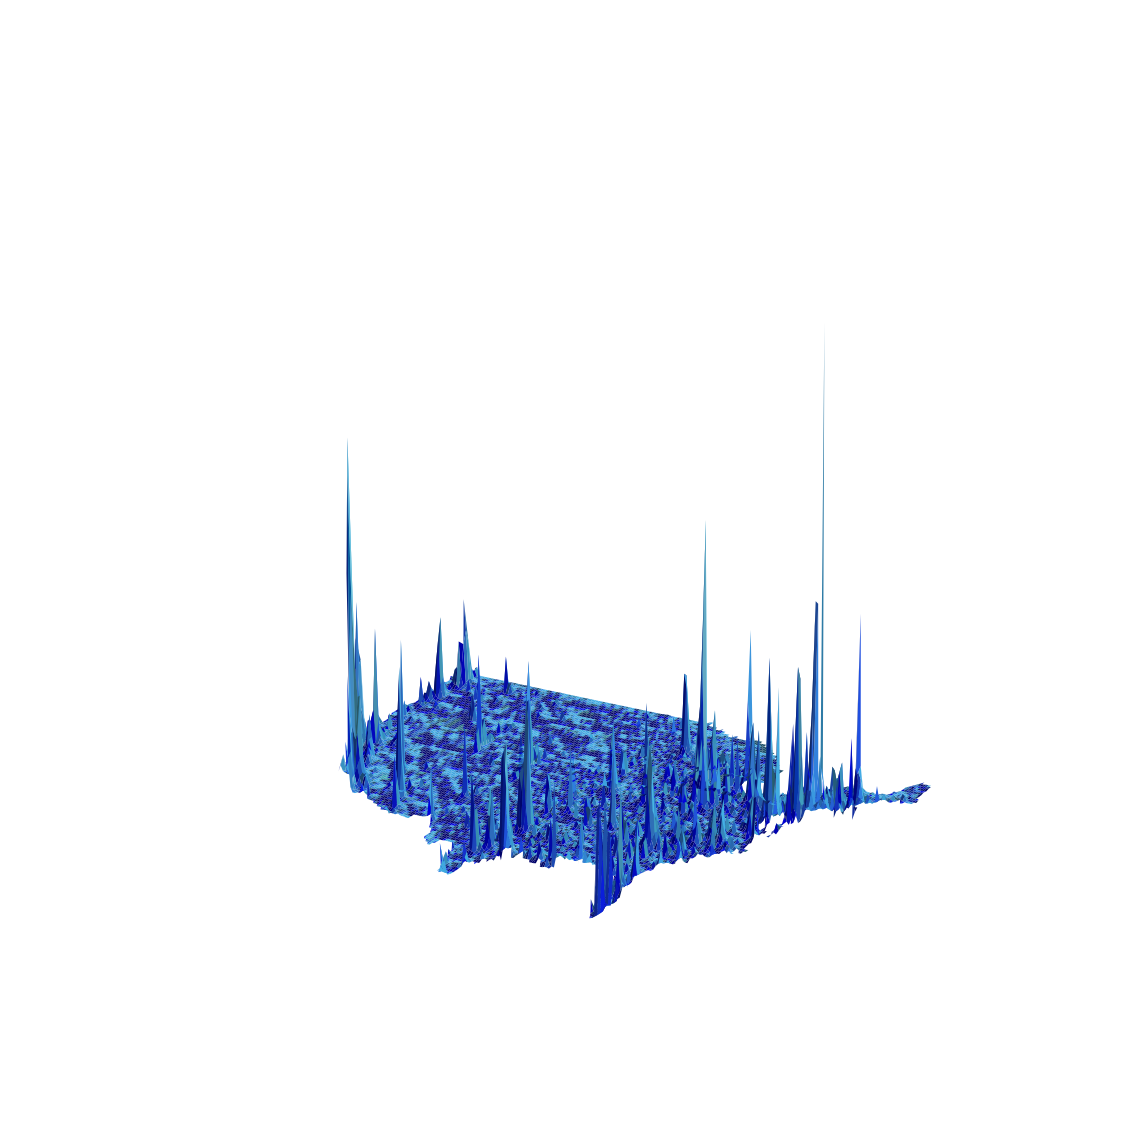

In [12]:
fig = plt.figure(figsize=(16, 16))
ax = fig.gca(projection='3d')

# Create a light source for shading
ls = LightSource(20, 45)
rgb = ls.shade(data, cmap=electric)

surf = ax.plot_surface(X, Y, Z,
                       # Smooth out the values
                       rstride=1, cstride=1, 
                       facecolors=rgb,
                       linewidth=0,
                       shade=True,
                       lightsource=ls
                       )
ax.view_init(20, 120)
ax.axis('off')
fig.tight_layout()

One point to note here is that the colors we see will depend on the position of the light source. Play around with a few values to see the difference.

<div style="width: 100%; overflow: hidden; text-align: center;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>